# DS_7331 Machine Learning - Lab 1 - Group 4

### Paticia Attah
### Linda Eliasen
### Senthil Kumar

### BUSINESS UNDERSTANDING

The H-1B Dataset selected for this project contains data from employer’s Labor Condition Application and the case certification determinations processed by the Office of Foreign Labor Certification (OFLC) where the date of the determination was issues on or after October 1, 2016 and on or before June 30, 2017.<br>
<br>The Labor Condition Application (LCA) is a document that a perspective H-1B employer files with U.S. Department of Labor Employment and Training Administration (DOLETA) when it seeks to employ non-immigrant workers at a specific job occupation in an area of intended employment for not more than three years.<br>
<br>Our goal for this project is to predict the case status of an application submitted by the employer to hire non-immigrant workers under the H-1B visa program. Employer can hire non-immigrant workers only after their LCA petition is approved. The approved LCA petition is then submitted as part of the Petition for a Non-immigrant Worker application for work authorizations for H-1B visa status.<br>
<br>We want to uncover insights that can help employers understand the process of getting their LCA approved. We will use WEKA software to run data mining algorithms to understand the relationship between attributes and the target variable.

### DATA MEANING  & TYPE

The original dataset is the case disclosure file for the 2017 LCA Programs (H-1B, H-1B1, E-3) released by the Department of Labor.  It contained 624,650 observations and 52 informational variables.  

The dataset was trimmed to not only reduce the size but also to remove variables that did not pertain to the analysis (such as address details beyond city and state, phone numbers, salary survey source data).

The final subset of the data includes:
-  H-1B Petitions
-  FT Positions
-  Case Status of Certified, Certified-Withdrawn and Denied
-  Work States in the Contiguous US, including Alaska

The final dataset for use in the analysis contains 575,591 observations and 29 feature variables (including three engineered features as indicated in the table below).  

Original 2017 Data File:  https://www.dol.gov/agencies/eta/foreign-labor/performance


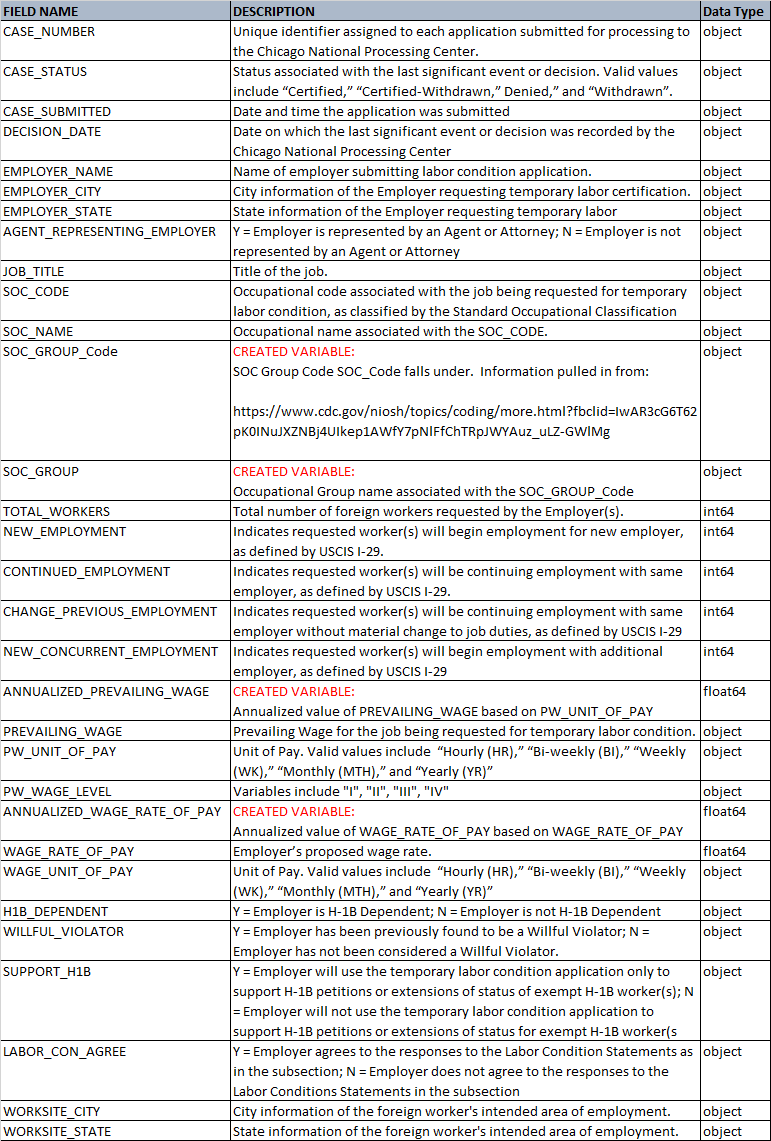

Bringing in the data

In [44]:
import pandas as pd 
import numpy as np
import plotly as py
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [45]:
df = pd.read_csv('H-1B__Data_FY17.csv')

df.head(3)

/Users/patriciaattah/opt/anaconda3/envs/ML7331/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_CODE,...,PW_WAGE_LEVEL,ANNUALIZED_WAGE_RATE_OF_PAY,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_STATE
0,I-200-17075-764873,CERTIFIED,3/16/2017,3/22/2017,BTY DENTAL GROUP LLC,ANCHORAGE,AK,Y,DENTIST,29-1021,...,Level II,165609.6,79.62,Hour,N,N,NaN,NaN,ANCHORAGE,AK
1,I-200-17083-576785,CERTIFIED,3/24/2017,3/30/2017,BTY DENTAL GROUP LLC,ANCHORAGE,AK,Y,DENTIST,29-1021,...,Level II,165609.6,79.62,Hour,N,N,NaN,N,ANCHORAGE,AK
2,I-200-17160-672299,CERTIFIED-WITHDRAWN,6/13/2017,7/26/2017,"HALLIBURTON ENERGY SERVICES, INC.",HOUSTON,TX,Y,GENERAL FIELD PROFESSIONAL - DIRECTIONAL DRILLING,17-2171,...,Level II,172800.0,172800.00,Year,N,N,NaN,NaN,PRUDHOE BAY,AK


Data Manipulation

In [46]:
# NEW COLUMN "CERTIFIED" combines certified & certified-withdrawn. 
# Both indicate the LCA Petition was approved.  Employer withdrew petition after certification.

df['CERTIFIED'] = np.where(df['CASE_STATUS']!='DENIED', 1,0)

In [47]:
# NEW COLUMN "PAY_ABOVE_PREV_WAGE" to calculate if wage rate is greater than or equal to prevailing wage
# Condition of certification process

df['PAY_ABOVE_PREV_WAGE'] = np.where(df['ANNUALIZED_WAGE_RATE_OF_PAY']>=df['ANNUALIZED_PREVAILING_WAGE'], '1', '0')

pay_compare = df.get(['ANNUALIZED_WAGE_RATE_OF_PAY', 'ANNUALIZED_PREVAILING_WAGE', 'PAY_ABOVE_PREV_WAGE'])
pay_compare.head(5)

pay_compare_totals_df = df.groupby(['PW_WAGE_LEVEL', 'PAY_ABOVE_PREV_WAGE']).size().reset_index(name='counts')



In [48]:
# NEW COLUMN "DAYS_PROCESS"
df['CASE_SUBMITTED'] = pd.to_datetime(df['CASE_SUBMITTED'])
df['DECISION_DATE'] = pd.to_datetime(df['DECISION_DATE'])

df['DAYS_PROCESS'] = ((df['DECISION_DATE'] - df['CASE_SUBMITTED']).dt.days)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575591 entries, 0 to 575590
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   CASE_NUMBER                  575591 non-null  object        
 1   CASE_STATUS                  575591 non-null  object        
 2   CASE_SUBMITTED               575591 non-null  datetime64[ns]
 3   DECISION_DATE                575591 non-null  datetime64[ns]
 4   EMPLOYER_NAME                575552 non-null  object        
 5   EMPLOYER_CITY                575591 non-null  object        
 6   EMPLOYER_STATE               575577 non-null  object        
 7   AGENT_REPRESENTING_EMPLOYER  488476 non-null  object        
 8   JOB_TITLE                    575589 non-null  object        
 9   SOC_CODE                     575591 non-null  object        
 10  SOC_NAME                     575590 non-null  object        
 11  SOC_GROUP_Code            

### DATA QUALITY

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

LINDA - EXCEL

### SIMPLE STATISTICS

In [50]:
#Subset of count variables for summary statistics chart  ERROR UNTIL DAYS_PROCESS IS ADDED ABOVE
dfssc = pd.DataFrame([df.TOTAL_WORKERS, df.NEW_EMPLOYMENT, df.CONTINUED_EMPLOYMENT, df.DAYS_PROCESS]).transpose()
dfssc.describe()

,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,DAYS_PROCESS
count,575591.000000,575591.000000,575591.000000,575591.000000
mean,1.948017,0.848464,0.333414,33.452813
std,4.975411,3.666063,1.276646,129.562100
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,6.000000
50%,1.000000,0.000000,0.000000,6.000000
75%,1.000000,1.000000,0.000000,6.000000
max,155.000000,150.000000,55.000000,2214.000000


LINDA Discuss Above


### Plotting Outliers

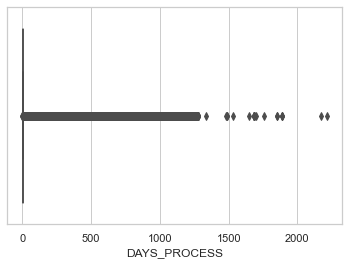

In [51]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["DAYS_PROCESS"])

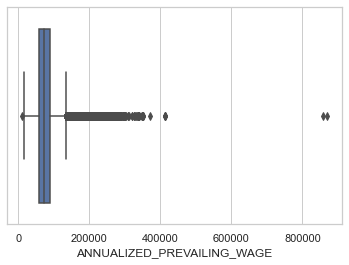

In [52]:
ax = sns.boxplot(x=df["ANNUALIZED_PREVAILING_WAGE"])

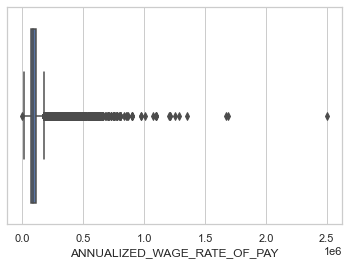

In [53]:
ax = sns.boxplot(x=df["ANNUALIZED_WAGE_RATE_OF_PAY"])

#### OUTLIER REMOVAL
After checking our describe column we noticed there were outliers because the mean values were very much below the maximum values for days the mean was 33 days while the max number of days were 2214, For anualised prevailing wage the mean was 77,212.00 per year while the maximaum value was 86,8400.00 and for the annualized wage rate of pay the mean value was 93,184.00 while the max value was 250,000.00 per year. Visually we can see these from the charts above.<br>
<br>To ensure the integrity of the data was kept we divided these variable into three quartiles and subtracted the two quatiles to get the prevalent range of data which we chose to make 92% then take values that were 3 times the interquartile range (IQR) of 92% methode encompassed most of the data and left only very extreme outliers.<br>

<br>We chose to remove the outliers because they were mistakes as the annaulised data is a column formed from the wage rate of pay column and some of the rows in this column were improperly labelled hence the the annualised cilumn was multiplied by the wrong multiple and drastically increased.

In [54]:
# outilier removal code
Q1=df['DAYS_PROCESS'].quantile(0.08)
Q3=df['DAYS_PROCESS'].quantile(0.92)
IQR=Q3-Q1
#print(Q1)
#print(Q3)
#print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

df_0 = df[df['DAYS_PROCESS']< Upper_Whisker]

Q1=df_0['ANNUALIZED_PREVAILING_WAGE'].quantile(0.8)
Q3=df_0['ANNUALIZED_PREVAILING_WAGE'].quantile(0.92)
IQR=Q3-Q1
#print(Q1)
#print(Q3)
#print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

df_0 = df_0[df_0['ANNUALIZED_PREVAILING_WAGE']< Upper_Whisker]


Q1=df_0['ANNUALIZED_WAGE_RATE_OF_PAY'].quantile(0.8)
Q3=df_0['ANNUALIZED_WAGE_RATE_OF_PAY'].quantile(0.92)
IQR=Q3-Q1
#print(Q1)
#print(Q3)
#print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

df = df_0[df_0['ANNUALIZED_WAGE_RATE_OF_PAY']< Upper_Whisker]

-5.0 19.0
63148.5 148512.5
75110.09199999983 181483.18000000028


### Missing values 
This data set was very extensive over 500,000 insatnces since there was an abundance of rows the missing values that were not imputed back in the excel file were removed. The original data dimensions were 575591 rows with 31 columns, after all null values were removed the resulting file had 86402 rows 32 and 32 features as the days process feature was added

In [55]:
df = df.dropna(subset=['EMPLOYER_NAME',
                         'AGENT_REPRESENTING_EMPLOYER','JOB_TITLE','SOC_NAME',
                        'PREVAILING_WAGE','PW_UNIT_OF_PAY','WAGE_UNIT_OF_PAY',
                        'EMPLOYER_CITY','WAGE_UNIT_OF_PAY','WILLFUL_VIOLATOR',
                         'WORKSITE_CITY','WILLFUL_VIOLATOR','SUPPORT_H1B','LABOR_CON_AGREE',
                          'WORKSITE_STATE'])

In [56]:
df.isnull().sum()

CASE_NUMBER                    0
CASE_STATUS                    0
CASE_SUBMITTED                 0
DECISION_DATE                  0
EMPLOYER_NAME                  0
EMPLOYER_CITY                  0
EMPLOYER_STATE                 0
AGENT_REPRESENTING_EMPLOYER    0
JOB_TITLE                      0
SOC_CODE                       0
SOC_NAME                       0
SOC_GROUP_Code                 0
SOC_GROUP                      0
TOTAL_WORKERS                  0
NEW_EMPLOYMENT                 0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
ANNUALIZED_PREVAILING_WAGE     0
PREVAILING_WAGE                0
PW_UNIT_OF_PAY                 0
PW_WAGE_LEVEL                  0
ANNUALIZED_WAGE_RATE_OF_PAY    0
WAGE_RATE_OF_PAY               0
WAGE_UNIT_OF_PAY               0
H1B_DEPENDENT                  0
WILLFUL_VIOLATOR               0
SUPPORT_H1B                    0
LABOR_CON_AGREE                0
WORKSITE_CITY                  0
WORKSITE_S

In [57]:
df.shape

(86402, 34)

In [73]:
#Subset of wage variables for summary statistics chart
dfssw = pd.DataFrame([df.ANNUALIZED_WAGE_RATE_OF_PAY, df.ANNUALIZED_PREVAILING_WAGE]).transpose()

In [74]:
#NOT WORKING TO REMOVE 0's WAIT UNTIL FINAL FILE IS IN

# Removing rows with prevailing wage of 0 to improve accuracy of the summary statistics

dfssw =dfssw[dfssw['ANNUALIZED_PREVAILING_WAGE'] > 0.33]

In [75]:
#dfssw[dfssw.ANNUALIZED_PREVAILING_WAGE[(df.ANNUALIZED_PREVAILING_WAGE > 0.33)].any()]
#dfssw.drop(dfssw.loc[dfssw['ANNUALIZED_PREVAILING_WAGE']==0].index, inplace=True)

#dfssw.loc[:,~dfssw.replace(0,np.nan).isna().all()]
dfssw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86402 entries, 35 to 575554
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ANNUALIZED_WAGE_RATE_OF_PAY  86402 non-null  float64
 1   ANNUALIZED_PREVAILING_WAGE   86402 non-null  float64
dtypes: float64(2)
memory usage: 2.0 MB


In [59]:
dfssw.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ANNUALIZED_WAGE_RATE_OF_PAY,ANNUALIZED_PREVAILING_WAGE
count,575591,575591
mean,93184.4,77212.2
std,41287.3,26615.1
min,0,12000
25%,66726,59859
50%,83000,71822
75%,109990,90189
max,2.5e+06,868400


In comparing the mean and quartile ranges of Annualized Wage Rate of Pay and Annualized Prevailing Wage, we see that Annualized Wage Rate of Pay is higher on all measures.  This indicates that employers are hiring workers at annual pay rates higher than prevailing market wages. This could be an indication of a skills shortage for these highly specialized roles.

### VISUALIZE ATTRIBUTES

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. 
Explain for each attribute why the chosen visualization is appropriate.

98.77986278451192% Petitions were Certified
1.220137215488081% Petitions were Denied


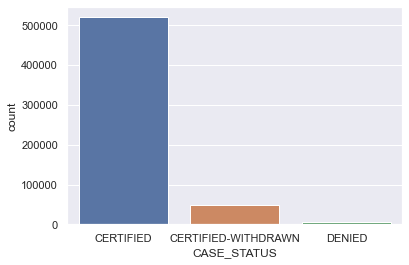

In [42]:
# H1-B Visa by Status
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="CASE_STATUS", data=df)

print("{}% Petitions were Certified".format(len(df[df['CERTIFIED']=='Y'])/float(df.shape[0])*100))
print("{}% Petitions were Denied".format(len(df[df['CERTIFIED']=='N'])/float(df.shape[0])*100))

This is our response variable. It was selected to understand the proportion of the data falling into each class (Certified or Denied).  Almost 98% of the petitions were certified, which means that we may have an issue when predicting case outcome during modeling for the under-represented class.  

Based on this, we need to investigate balancing the data as we move from EDA to classification.

The visualization is appropriate as we are comparing the number of occurrences or frequency for each case status and box plots are good in these situations.

In [34]:
#% of petitions filed by wage level
df["PW_WAGE_LEVEL"].value_counts(normalize = True) * 100

Level I      98.210014
Level II      1.738735
Level III     0.049514
Level IV      0.001737
Name: PW_WAGE_LEVEL, dtype: float64

This table shows the percentage of petitions filed by prevaling wage level category.  The majority (98%) of petitions filed were for Level 1 jobs (annual prevailing wage below $150,000).  

This could indicate job growth or a skills shortage at the mid-management and below levels. If this is the case, it is helpful knowledge for an Employer when developing their org development strategy.  It also plays a significant part in establishing deparatmental budgets and balancing the costs and recruiting time associated with H-1B hires vs. the US workforce.  

A table was selected to clearly see the values of each category.

<Figure size 576x288 with 0 Axes>

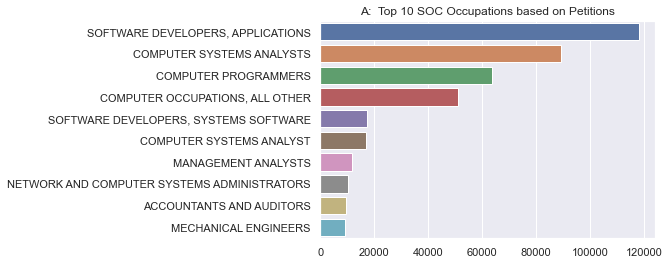

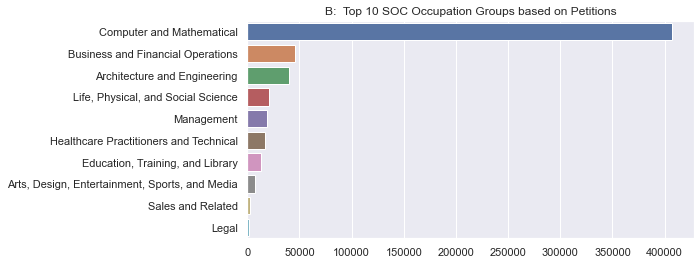

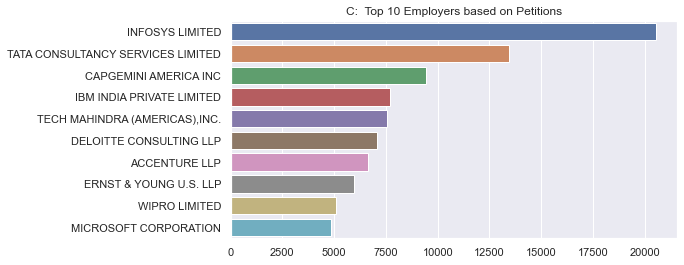

<Figure size 576x288 with 0 Axes>

In [79]:
#Top 10 SOC Occupations based on Petitions
soc = df['SOC_NAME'].value_counts()[:10]
sns.barplot(x= soc.values, y = soc.index)
plt.title("A:  Top 10 SOC Occupations based on Petitions",y=1)
plt.figure(figsize=(8,4))

#Top 10 SOC Occupation Groups based on Petitions
soc = df['SOC_GROUP'].value_counts()[:10]
sns.barplot(x= soc.values, y = soc.index)
plt.title("B:  Top 10 SOC Occupation Groups based on Petitions",y=1)
plt.figure(figsize=(8,4))

#Top 10 companies based on TOTAL_WORKERS
emp = df['EMPLOYER_NAME'].value_counts()[:10]
sns.barplot(x= emp.values, y = emp.index)
plt.title("C:  Top 10 Employers based on Petitions",y=1)
plt.figure(figsize=(8,4))

The Standard Occupational Classification System (SOC Code) is the US government system of classifying occupations. There are approximately 900 SOC Codes. 

Chart A shows the top 10 SOC occupations, based on petitions submitted, 7 of which are computer related. While it is interesting to see which SOC occupations rank at the top, it may be more meaningful to view the data by SOC group, which collapses the 900 SOC Codes into 23 Occupation Groups.

This grouping is reflected in Chart B.  In addition to Computer and Mathmatical fields, the next largest occupational groups fall under Business and Financial Operations and Architecture and Engineering.

These findings are reasonable as the H-1B program is for hiring nonimmigrant aliens as workers in occupations that requires the application of a body of highly specialized knowledge. 

The key findings that the Computer and Mathmatical Group and occupations such as developers, systems analysts and programmers are the top petitioners for certification are further reinforced in Chart C.  Chart C indicates that the top 10 companies seeking H-1B visas are systems related industries.

These attributes were selected in order to understand and gain insight into what types of jobs are included and which emmployers are more likely to pursue H-1Bs.

The visualization is appropriate as it provides a clear comparison between the top ten rankings in each chart.

In [89]:
df_balanced= pd.read_csv (r'Balanced_Visa_Data.csv')

In [90]:
import squarify 

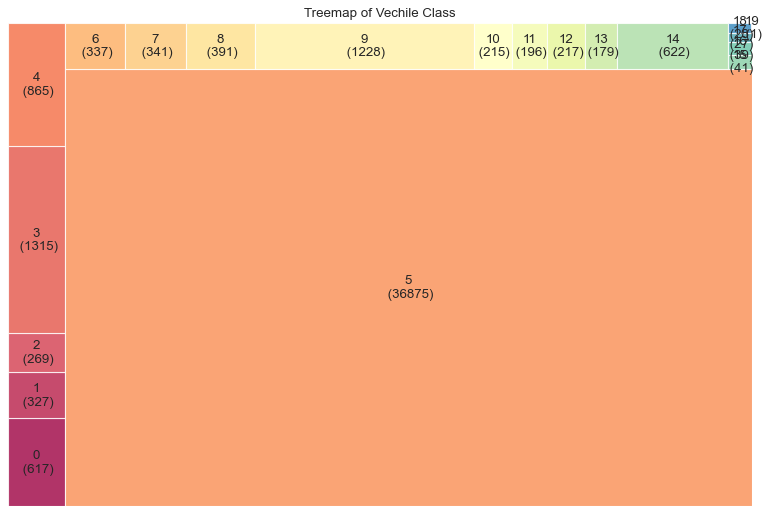

In [91]:
# Prepare Data
df = df_balanced.groupby('SOC_GROUP_CODE').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()



### SOC Group Variable
the SOC Group are the fields of work that the visa applicants are being considered for We can see that the majority of the employers are applying for Computer and Mathematics feild. The codes of each feild is given below as well as the number of application for those feilds

#### SOC GROUP CODE KEY

{'Architecture and Engineering': 0,<br>
 'Arts, Design, Entertainment, Sports, and Media': 1,<br>
 'Building and Grounds Cleaning and Maintenance': 2,<br>
 'Business and Financial Operations': 3,<br>
 'Community and Social Service': 4,<br>
 'Computer and Mathematical': 5,<br>
 'Construction and Extraction': 6,<br>
 'Education, Training, and Library': 7,<br>
 'Food Preparation and Serving Related': 8,<br>
 'Healthcare Practitioners and Technical': 9,<br>
 'Healthcare Support': 10,<br>
 'Installation, Maintenance, and Repair': 11,<br>
 'Legal': 12,<br>
 'Life, Physical, and Social Science': 13,<br>
 'Management': 14,<br>
 'Office and Administrative Support': 15,<br>
 'Personal Care and Service': 16,<br>
 'Production': 17,<br>
 'Sales and Related': 18,<br>
 'Transportation and Material Moving': 19}<br>

In [92]:
VisaStatus_df = df_balanced.groupby(['SOC_GROUP']).size().reset_index(name='counts')
print(VisaStatus_df)

                                         SOC_GROUP  counts
0                     Architecture and Engineering     617
1   Arts, Design, Entertainment, Sports, and Media     327
2    Building and Grounds Cleaning and Maintenance     269
3                Business and Financial Operations    1315
4                     Community and Social Service     865
5                        Computer and Mathematical   36875
6                      Construction and Extraction     337
7                 Education, Training, and Library     341
8             Food Preparation and Serving Related     391
9           Healthcare Practitioners and Technical    1228
10                              Healthcare Support     215
11           Installation, Maintenance, and Repair     196
12                                           Legal     217
13              Life, Physical, and Social Science     179
14                                      Management     622
15               Office and Administrative Support      

<AxesSubplot:ylabel='DAYS_PROCESS'>

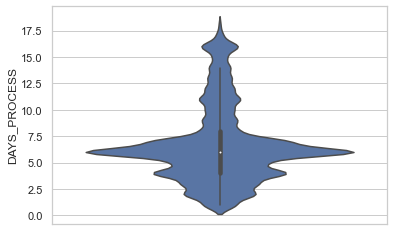

In [95]:
sns.violinplot(y=df_balanced['DAYS_PROCESS'], orient='vertical')

### Days Processsed Variable
These values shows the majority number of days it takes the process of certification to be complete we see that most applications are certified about on the 6th day.

<Figure size 576x288 with 0 Axes>

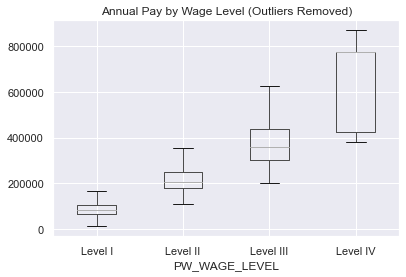

<Figure size 576x288 with 0 Axes>

In [92]:
df.boxplot(column='ANNUALIZED_WAGE_RATE_OF_PAY', by='PW_WAGE_LEVEL', showfliers=False)
plt.title("Annual Pay by Wage Level (Outliers Removed)",y=1)
plt.suptitle("")
plt.figure(figsize=(8,4))


The above chart of Annual Pay by Wage Level (excluding outliers) indicates that Level III and IV have a wide distribution of annual pay and are skewed, while Level I is much more narrow.  The inter-quartile ranges are distinct, indicating stepped progression from one wage level to the next. 

A box plot was selected as this type of graph shows the dispersion of the dataset.

US HEATMAP

### EXPLORE JOINT ATTRIBUTES
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.


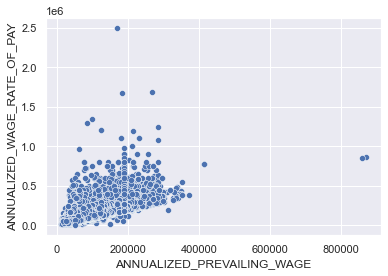

In [97]:
# Relationship between Prevailing Wage and Annualized Wage Rate

#  RERUN WITH OUTLIERS REMOVED DATAFRAME

sns.scatterplot(data = df, x = "ANNUALIZED_PREVAILING_WAGE", y = "ANNUALIZED_WAGE_RATE_OF_PAY")

plt.show()



TBD.... NEED TO TRY TO GET A BETTER VISIUAL OF THE CHART

The above scatterplot of Annualized Wage Rate of Pay and Annualized Prevailing Wage indicates a positive correlation and confirms our belief that employers are using external prevailing wage data when determining a new hire's annual salary.  Also reflected in the chart are a handful of outliers  where annual pay was set outside of the normal range of pay.  

A scatterplot is a good choice for understanding relationships between two continuous variables.

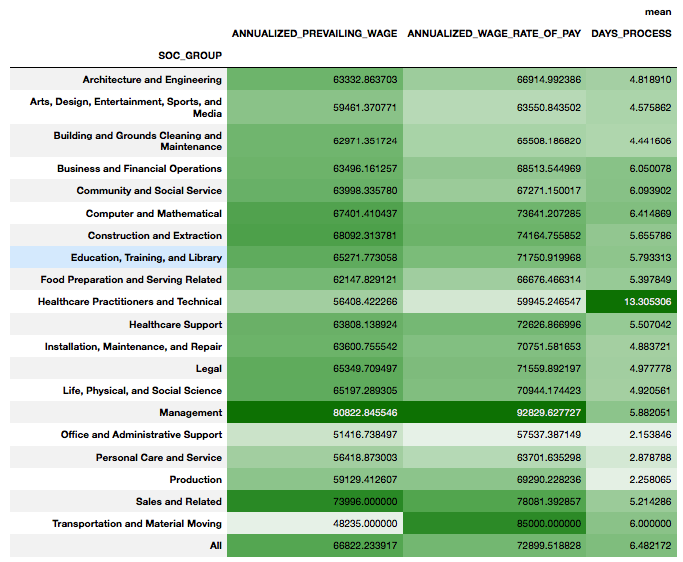

In [86]:
# UNBALANCED DATA
from IPython.display import Image
df_jobtype = pd.pivot_table(df_balanced,
                        values = ['DAYS_PROCESS','ANNUALIZED_PREVAILING_WAGE','ANNUALIZED_WAGE_RATE_OF_PAY'],
                        index = ['SOC_GROUP'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')

cm = sns.light_palette("green", as_cmap=True)
df_jobtype.style.background_gradient(cmap=cm)
Image(filename = 'SOC_GROUP_WAGES.png')

### SOC Group /Annualized Prevailing Wage / Annualized Wage Rate Of Pay / Days Processed
The above table is a side by side comparison of the mean wage values between the prevailing market value of a feild of work and the amount the empoyer offered for those fields of work. We noticed a constant pattern that the employer in all fields pay higher than the prevailing market rates for wages some of the fields that have the most significant difference are trasportation and material moving sector with a 76% in crease between the employer offered wage and prevailing market wage, and the management field with about a 15% increase compared to the prevailing market wage. 

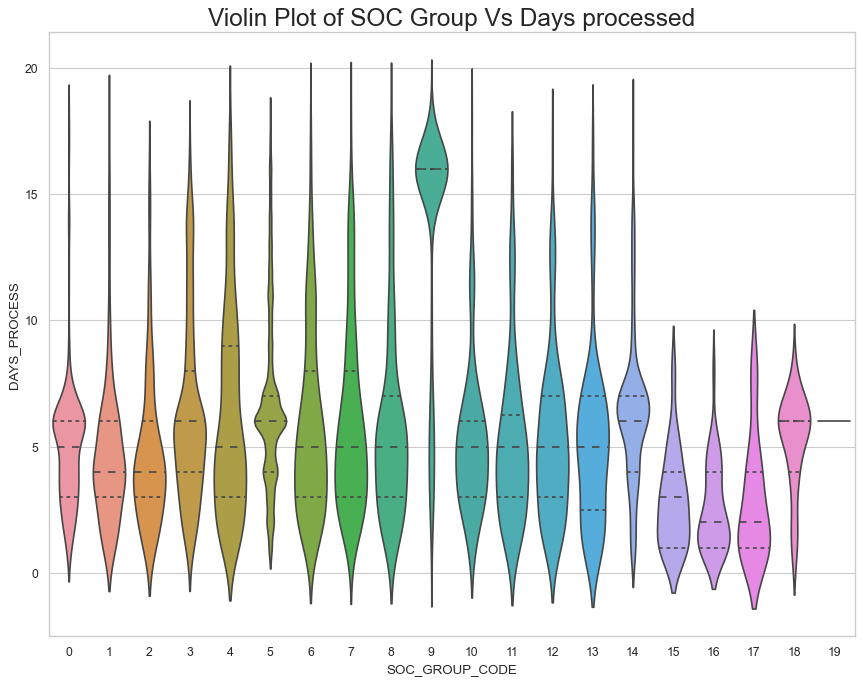

In [84]:
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='SOC_GROUP_CODE', y='DAYS_PROCESS', data=df_balanced, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of SOC Group Vs Days processed', fontsize=22)
plt.show()

### Case status Vs Days Processed
From the plot Above we see that the mean time for most fields of work are between 3 to days, Hwever there is one feild which is healthcare that has a mean process time of about 16 days. while the feilds that are proceesed in the shortest amount of time are production workers and personal care services which both have a mean process time of about 3 days. 

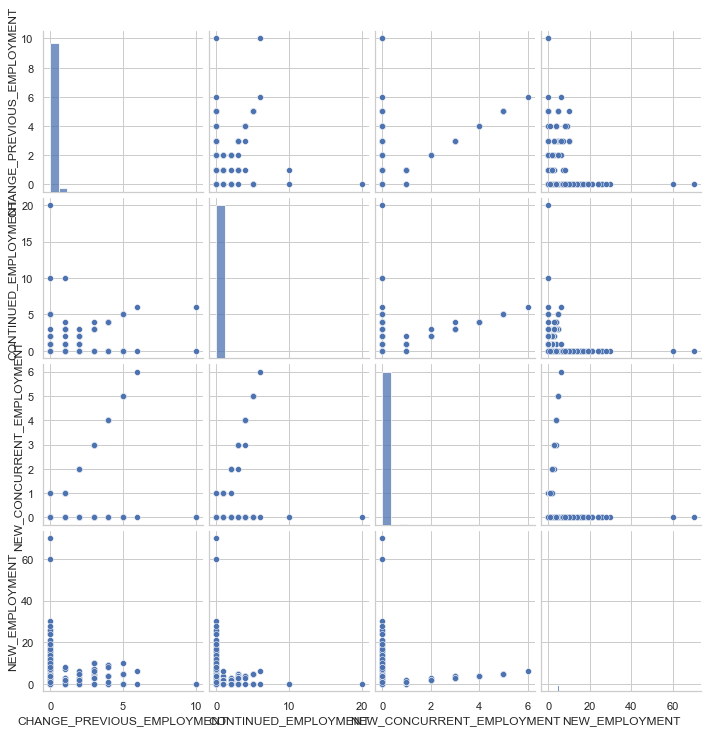

In [93]:
df_pairplot = df_balanced[['CHANGE_PREVIOUS_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 
                           'NEW_CONCURRENT_EMPLOYMENT', 'NEW_EMPLOYMENT']]

sns.pairplot(df_pairplot)

In [94]:
df_pairplot.corr()

,CHANGE_PREVIOUS_EMPLOYMENT,CONTINUED_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,NEW_EMPLOYMENT
CHANGE_PREVIOUS_EMPLOYMENT,1.000000,0.304985,0.423668,0.083102
CONTINUED_EMPLOYMENT,0.304985,1.000000,0.310833,-0.064460
NEW_CONCURRENT_EMPLOYMENT,0.423668,0.310833,1.000000,0.066132
NEW_EMPLOYMENT,0.083102,-0.064460,0.066132,1.000000


#### Correlation Plot
The above charts and tables show the correlation between the number of employees that had different employers from the country they are from, the employers that applied for induviduals that were working for the comapny in thier own country which is the continued employment, the change previous employment that is the employers that will apply for employees from their same comapany without cahnge to their previous job duties and the new concurrent which specifies that the employee will have employment from an additional employer  we see that the is not much correlation between these feilds as there is no correlation that is above 0.5 (50%). While the highest correltion is 0.42 which is new concurrent employment and change previous employment.

### EXPLORE ATTRIBUTES & CLASS
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).


In [80]:
df_balanced= pd.read_csv (r'Balanced_Visa_Data.csv')

In [81]:
df_balanced.pivot_table(index='CASE_STATUS', columns='AGENT_REPRESENTING_EMPLOYER',
                    aggfunc={'H1B_DEPENDENT_CODE':sum,'ANNUALIZED_WAGE_RATE_OF_PAY':'mean', 'ANNUALIZED_PREVAILING_WAGE':'mean'})

ANNUALIZED_PREVAILING_WAGE                \
AGENT_REPRESENTING_EMPLOYER                          N             Y   
CASE_STATUS                                                            
CERTIFIED                                 67923.953893  67130.220054   
CERTIFIED-WITHDRAWN                       67766.719399  67793.018236   
DENIED                                    65724.782800  71145.701145   

                            ANNUALIZED_WAGE_RATE_OF_PAY                \
AGENT_REPRESENTING_EMPLOYER                           N             Y   
CASE_STATUS                                                             
CERTIFIED                                  72337.848608  76711.285524   
CERTIFIED-WITHDRAWN                        74621.555113  77376.131465   
DENIED                                     70170.310871  78749.808638   

                            H1B_DEPENDENT_CODE        
AGENT_REPRESENTING_EMPLOYER                  N     Y  
CASE_STATUS                                           
CERTIFIED                                 8543  5660  
CERTIFIED-WITHDRAWN                      11837  1711  
DENIED                                    9452  1207

### Target (Case Status) Vs Annualised Prevailing wage / Annualised wage rate of pay  
A portion of the chart above is visualized in the bar plots below. The plots are all integrated to show the relationship between the target class in this analysis is the case status, agent representing the employer and the annualised prevailing wage. Form the charts it seems that in the case of annualised wage rate of pay which is that the employer pays the Visa applicant, The employers that have an agent representing the company generally pays higher than the employers that do not have an attorney or agent representing them. the difference in mean between the employers that had an attorney representing them and those that did not were 4,374 for the certified applicants, 2,755 for the certified withdrawn applicants and 8,579 for the denied applicants. That means that the average diffrence for the employers that had an attirney representing them was about 5,236<br>
While for the annualised prevailing wage there was no little to no difference for the employers that had an agent representing them and the companies that did not have an agent reprenting them.<br>
We also noticed that a large number of employers that did not have an attoney representing them and were not H1B dependent later withdrew their certification that was about 87%, and also a large number of employers that did not have an employer representing them and were not H1B dependent were denied about 88% of the denied applications were from unrepresented employers, However for the certified applicants there was not much difference between the employers that had an attorney and those that did not, although the companies that had an attorney were slightly lower in number. Also from the bar plot below the box plot we can see that in all levels of case status ceritifed, certified withdrawn and denied we see that the majority of companies that are H1B dependent.

/Users/patriciaattah/opt/anaconda3/envs/ML7331/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/patriciaattah/opt/anaconda3/envs/ML7331/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


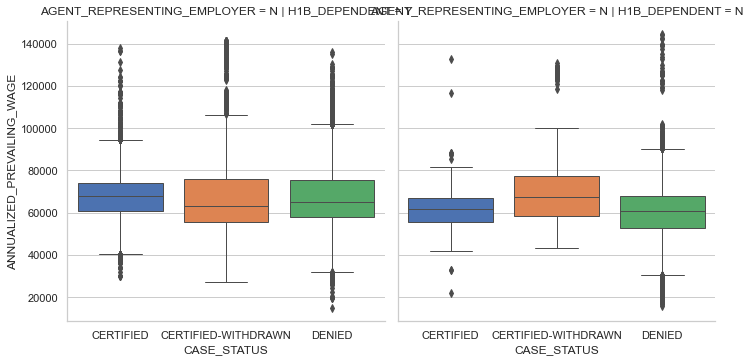

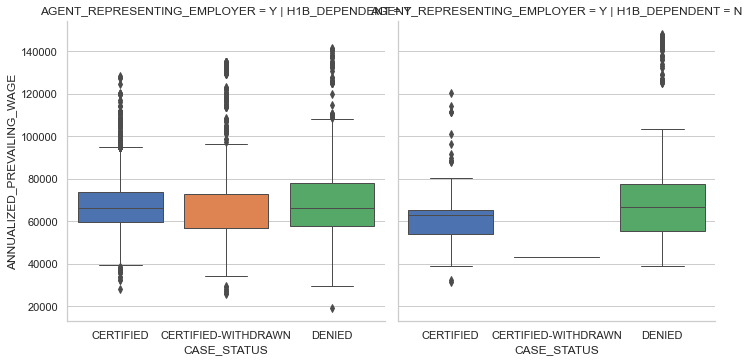

In [82]:
for i in set(df_balanced['AGENT_REPRESENTING_EMPLOYER']):
    aa= df_balanced[df_balanced['AGENT_REPRESENTING_EMPLOYER'].isin([i])]
    g = sns.factorplot(x='CASE_STATUS', y="ANNUALIZED_PREVAILING_WAGE",data=aa, 
                   saturation=1, kind="box", col = 'H1B_DEPENDENT', row = 'AGENT_REPRESENTING_EMPLOYER',
                   ci=None, aspect=1, linewidth=1) 

/Users/patriciaattah/opt/anaconda3/envs/ML7331/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/patriciaattah/opt/anaconda3/envs/ML7331/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


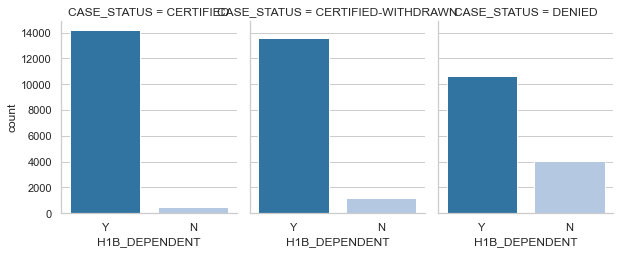

In [83]:
g = sns.catplot("H1B_DEPENDENT", col="CASE_STATUS", col_wrap=4,
                data=df_balanced[df_coded.NEW_EMPLOYMENT.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')
plt.show()

In [78]:
df_balanced= pd.read_csv (r'Balanced_Visa_Data.csv')

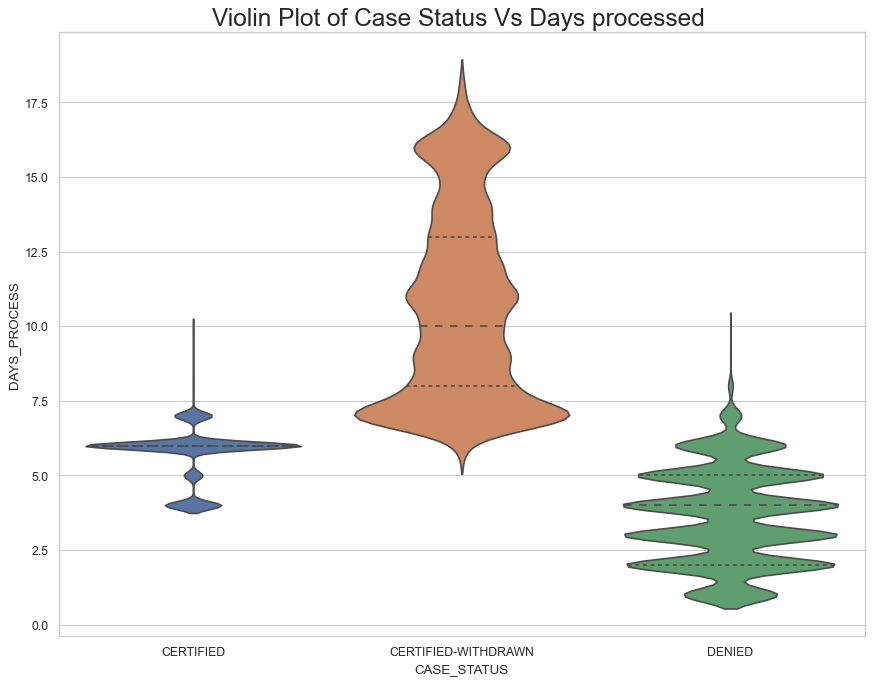

In [79]:
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='CASE_STATUS', y='DAYS_PROCESS', data=df_balanced, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Case Status Vs Days processed ', fontsize=22)
plt.show()

### Case status Vs Days Processed
From the plot Above we see that it seema that the certified withdrawn status generally have a higher mean than all other categories. while it seems that the denied status has the shortetst mean amount of time befor the case final judgment is made. While for the certified cases the mean time before the process results is about 6 days.

/Users/patriciaattah/opt/anaconda3/envs/ML7331/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/patriciaattah/opt/anaconda3/envs/ML7331/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


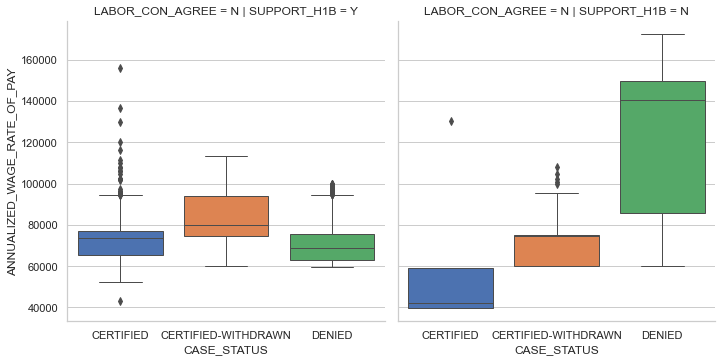

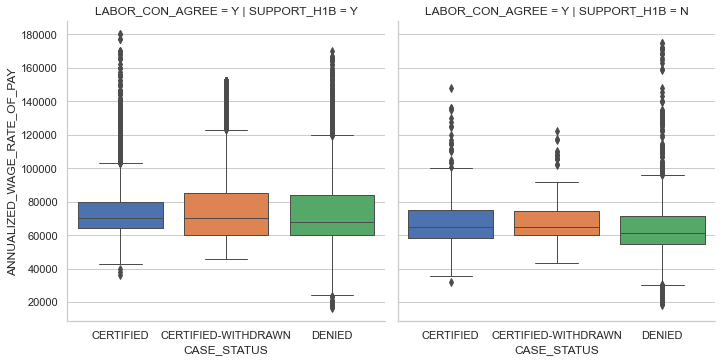

In [87]:
for i in set(df_balanced['LABOR_CON_AGREE']):
    aa= df_balanced[df_balanced['LABOR_CON_AGREE'].isin([i])]
    g = sns.factorplot(x='CASE_STATUS', y="ANNUALIZED_WAGE_RATE_OF_PAY",data=aa, 
                   saturation=1, kind="box", col = 'SUPPORT_H1B', row = 'LABOR_CON_AGREE',
                   ci=None, aspect=1, linewidth=1) 

### Annnualised Wage Rate of Pay
From the above charts we can see that when the labor condition agreemant is not available and the and the company does not need a labor condition agreement the mean rate of denial is high while the certified cases in this condition is the lowest. All the other coditions regarding the labor condition agreement and whether the employer supports H1B that is they need the labor codition agreement to certify their applicant is near similar although in the case where the employer neede that H1B agreement hence support H1B and there is no labor condition agreement thye denial rate seems to be slightly lower. The cross table can be seen below

In [88]:
df_balanced.pivot_table(index='CASE_STATUS', columns='SUPPORT_H1B',
                    aggfunc={'LABOR_CON_AGREE_CODE':sum, 'ANNUALIZED_PREVAILING_WAGE':'mean'})

ANNUALIZED_PREVAILING_WAGE                \
SUPPORT_H1B                                  N             Y   
CASE_STATUS                                                    
CERTIFIED                         62149.898690  67874.348485   
CERTIFIED-WITHDRAWN               63547.769994  68203.723916   
DENIED                            61604.326114  67687.527903   

                    LABOR_CON_AGREE_CODE         
SUPPORT_H1B                            N      Y  
CASE_STATUS                                      
CERTIFIED                            682  13054  
CERTIFIED-WITHDRAWN                 1331  12995  
DENIED                              3275  10789

### NEW FEATURES
Are there other features that could be added to the data or created from existing features? Which ones?

#### Days_Process
Days process was created by changeing the original colummns case submitted and decision date from data type object to datatime pythin object so that mathematical functions can be applied to it. then decision date is subtracted from the case sunbmitted date and the difference is stored in Days_processed feature.

LINDA

## Exceptional work - Balancing / Encodinig data
from the plots below we can see that there is an extremely low amount of Denied and Certified withdrawn these values will not be able to give us clear understanding of what is happeneing in the data so the lower columns need to be upscaled to meet the number of values for the Certified category.<br>
A python module label encoder was importeed to encode the string variable features and change them to floats, because the balancing module that will be used can not work with string characters. the module used to balance the data is called SMOTE. In this project we chose to upscale the variable since the smaller variable were too small.<br>
However before we balanced the data in order to reduce the unevenness of the of the upscale the certified column was reduced in number from 84,710 to 14,537.<br>

In [58]:
VisaStatus_df = df.groupby(['CASE_STATUS']).size().reset_index(name='counts')
print(VisaStatus_df)

           CASE_STATUS  counts
0            CERTIFIED   84710
1  CERTIFIED-WITHDRAWN     828
2               DENIED     864


<AxesSubplot:title={'center':'count (target)'}>

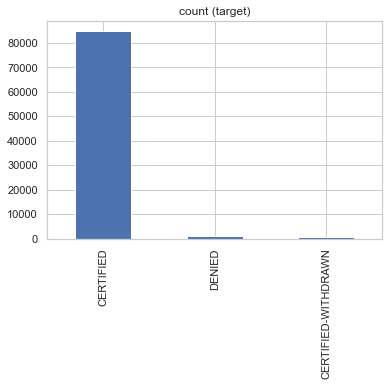

In [59]:
df['CASE_STATUS'].value_counts().plot(kind='bar', title='count (target)')

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [61]:
features = ['EMPLOYER_NAME', 'EMPLOYER_CITY','SOC_NAME','SOC_GROUP',
           'EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE',
            'WILLFUL_VIOLATOR','WORKSITE_CITY','WORKSITE_STATE','PW_UNIT_OF_PAY',
           'PW_WAGE_LEVEL','WAGE_UNIT_OF_PAY','H1B_DEPENDENT','SUPPORT_H1B','LABOR_CON_AGREE']
encoded = []

keys = {}

le = LabelEncoder()

for f in features:
    df[f+'_CODE'] = le.fit_transform(df[f])
    b=f+'_CODE'
    encoded.append(b)
    keys[f+'_CODE'] = {l: i for i, l in enumerate(le.classes_)}
    
df_cut = df.drop(['DECISION_DATE','CASE_SUBMITTED','CASE_NUMBER'], axis=1)

df_cut.head(3)

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_CODE,SOC_NAME,SOC_GROUP_Code,SOC_GROUP,...,JOB_TITLE_CODE,WILLFUL_VIOLATOR_CODE,WORKSITE_CITY_CODE,WORKSITE_STATE_CODE,PW_UNIT_OF_PAY_CODE,PW_WAGE_LEVEL_CODE,WAGE_UNIT_OF_PAY_CODE,H1B_DEPENDENT_CODE,SUPPORT_H1B_CODE,LABOR_CON_AGREE_CODE
35,CERTIFIED,WIPRO LIMITED,EAST BRUNSWICK,NJ,N,PROJECT MANAGER,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",15,Computer and Mathematical,...,3607,0,76,0,4,0,4,1,1,0
36,CERTIFIED,WIPRO LIMITED,EAST BRUNSWICK,NJ,N,VLSI ARCHITECT-L1,17-2072,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",17,Architecture and Engineering,...,6437,0,76,0,4,0,4,1,1,0
38,CERTIFIED,WIPRO LIMITED,EAST BRUNSWICK,NJ,N,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,15,Computer and Mathematical,...,3365,0,76,0,4,0,4,1,1,0


In [62]:
# Reduse the number of Certified from 84,710 to 14,537 to reduce extreme upscale
df_cut=df_cut.sort_values(by=['CASE_STATUS'])
df_cut=df_cut.iloc[70000:, :]

VisaStatus_df = df_cut.groupby(['CASE_STATUS']).size().reset_index(name='counts')
print(VisaStatus_df)

           CASE_STATUS  counts
0            CERTIFIED   14710
1  CERTIFIED-WITHDRAWN     828
2               DENIED     864


In [63]:
# Oversmaple the rest of the data to the upsacle to the y variable (CASE_STATUS)
yy = df_cut['CASE_STATUS']
X = df_cut.drop(['CASE_STATUS','EMPLOYER_NAME', 'EMPLOYER_CITY','SOC_GROUP',
             'SOC_NAME','EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE',
            'WILLFUL_VIOLATOR','WORKSITE_CITY','WORKSITE_STATE',
            'PW_UNIT_OF_PAY','PW_WAGE_LEVEL','WAGE_UNIT_OF_PAY','H1B_DEPENDENT',
            'WILLFUL_VIOLATOR','WORKSITE_CITY','WORKSITE_STATE','SOC_CODE'
                ,'SUPPORT_H1B','LABOR_CON_AGREE'], axis=1)

In [64]:
y = LabelEncoder().fit_transform(yy)

In [65]:
from collections import Counter


oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=14710 (33.333%)
Class=1, n=14710 (33.333%)
Class=2, n=14710 (33.333%)


In [69]:
coded_df = X
coded_df['CASE_STATUS_CODE'] = y

VisaStatus_df = coded_df.groupby(['CASE_STATUS_CODE']).size().reset_index(name='counts')
print(VisaStatus_df)

   CASE_STATUS_CODE  counts
0                 0   14710
1                 1   14710
2                 2   14710


In [70]:
# column header to be puuled from encoded dataset
recode = list(zip(encoded,features))
recoded = []
for i in recode:
    recoded.append(list(i))
recoded

[['EMPLOYER_NAME_CODE', 'EMPLOYER_NAME'],
 ['EMPLOYER_CITY_CODE', 'EMPLOYER_CITY'],
 ['SOC_NAME_CODE', 'SOC_NAME'],
 ['SOC_GROUP_CODE', 'SOC_GROUP'],
 ['EMPLOYER_STATE_CODE', 'EMPLOYER_STATE'],
 ['AGENT_REPRESENTING_EMPLOYER_CODE', 'AGENT_REPRESENTING_EMPLOYER'],
 ['JOB_TITLE_CODE', 'JOB_TITLE'],
 ['WILLFUL_VIOLATOR_CODE', 'WILLFUL_VIOLATOR'],
 ['WORKSITE_CITY_CODE', 'WORKSITE_CITY'],
 ['WORKSITE_STATE_CODE', 'WORKSITE_STATE'],
 ['PW_UNIT_OF_PAY_CODE', 'PW_UNIT_OF_PAY'],
 ['PW_WAGE_LEVEL_CODE', 'PW_WAGE_LEVEL'],
 ['WAGE_UNIT_OF_PAY_CODE', 'WAGE_UNIT_OF_PAY'],
 ['H1B_DEPENDENT_CODE', 'H1B_DEPENDENT'],
 ['SUPPORT_H1B_CODE', 'SUPPORT_H1B'],
 ['LABOR_CON_AGREE_CODE', 'LABOR_CON_AGREE']]

In [71]:
#pulling values from encoded df
codes = []
for i in recoded:
    temp = df[i]
    codes.append(temp.drop_duplicates())

### Exceptional work - Recoding data
After the data is balanced and upscaled all the variables are left in the is numeric form. theis would not be appropriate for visualization as there will not be descriptive labeles on the charts. So using For loops and zip function we pull the features and the codes from the unbalanced but encoded data set to and using left merge join then induvidually to the balanced data set so that the string values can be used for EDA.

<AxesSubplot:title={'center':'count (target)'}>

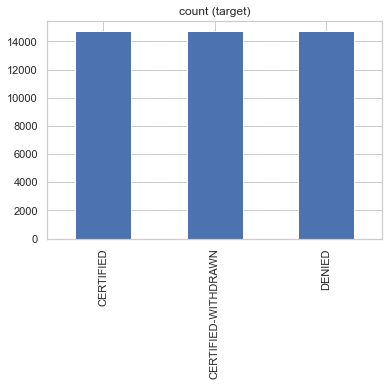

In [72]:
#merge data set to recode the required columns
import numpy as np

coded_data = coded_df.merge(codes[0], on='EMPLOYER_NAME_CODE', how = 'left')
coded_data = coded_data.merge(codes[1], on='EMPLOYER_CITY_CODE', how = 'left')
coded_data = coded_data.merge(codes[2], on='SOC_NAME_CODE', how = 'left')
coded_data = coded_data.merge(codes[3], on='SOC_GROUP_CODE', how = 'left')
coded_data = coded_data.merge(codes[4], on='EMPLOYER_STATE_CODE', how = 'left')
coded_data = coded_data.merge(codes[5], on='AGENT_REPRESENTING_EMPLOYER_CODE', how = 'left')
coded_data = coded_data.merge(codes[6], on='JOB_TITLE_CODE', how = 'left')
coded_data = coded_data.merge(codes[7], on='WILLFUL_VIOLATOR_CODE', how = 'left')
coded_data = coded_data.merge(codes[8], on='WORKSITE_CITY_CODE', how = 'left')
coded_data = coded_data.merge(codes[9], on='WORKSITE_STATE_CODE', how = 'left')
coded_data = coded_data.merge(codes[10], on='PW_UNIT_OF_PAY_CODE', how = 'left')
coded_data = coded_data.merge(codes[11], on='PW_WAGE_LEVEL_CODE', how = 'left')
coded_data = coded_data.merge(codes[12], on='WAGE_UNIT_OF_PAY_CODE', how = 'left')
coded_data = coded_data.merge(codes[13], on='H1B_DEPENDENT_CODE', how = 'left')
coded_data = coded_data.merge(codes[14], on='SUPPORT_H1B_CODE', how = 'left')
coded_data = coded_data.merge(codes[15], on='LABOR_CON_AGREE_CODE', how = 'left')


coded_data['CASE_STATUS'] = np.select([coded_data.CASE_STATUS_CODE == 0, coded_data.CASE_STATUS_CODE == 1], 
                        ['CERTIFIED', 'CERTIFIED-WITHDRAWN'], 
                        default='DENIED')

coded_data['CASE_STATUS'].value_counts().plot(kind='bar', title='count (target)')